다중 분류 문제
 - 소프트 맥스를 사용해서 

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import numpy as np
import pandas as pd
import sys
import tensorflow as tf

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
print("train set of image: %d 개" % (X_train.shape[0]))
print("test set of image: %d 개" % (X_test.shape[0]))

train set of image: 60000 개
test set of image: 10000 개


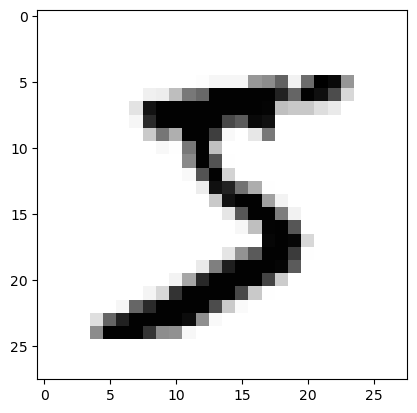

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

TypeError: 'numpy.float64' object is not iterable

In [9]:
print(X_train[0].shape[0])
# X_train[0] : 첫번쨰 데이터 
# shape[0] : 28 -> 0이 28개

28


In [10]:
print(X_train[0].shape[1])
# X_train[0] : 첫번쨰 데이터 
# shape[1] : 28 -> 1이 28개
# 28 x 28 픽셀 수의 그림으로 되어 있다 

28


mnist 데이터 : 3차원 데이터 

In [13]:
# 데이터 전처리: 2차원으로 바꾸기 

X_train = X_train.reshape(X_train.shape[0], -1) 
# 차원 변형 (첫번쨰 차원, 두번쨰 차원)
X_train = X_train.astype(float)

# 스케일이 너무 크기 떄무넹 스케일 맞춰주기 0~1 사이 
X_train = X_train/255

In [14]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [15]:
# test 데이터 전처리: 2차원으로 바꾸기 

X_test = X_test.reshape(X_test.shape[0], -1).astype(float) / 255

In [16]:
print(Y_train[0])

5


In [17]:
Y_train = utils.to_categorical(Y_train, 10)
Y_test = utils.to_categorical(Y_test, 10)

In [18]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
# 데이터 전처리가 끝났고 나머지 작업

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation = 'relu')) 
# 입력값은 784로, 이것을 512로 줄여준다. 
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR) :  # 같은 파일명이 존재하는지 확인
    os.mkdir(MODEL_DIR)   # 모델 생성
    

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) # 체크포인트 생성, 무엇을 체크할 것인지 지정(mointor)


early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [28]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0,
                   callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.15749, saving model to ./model/01-0.1575.hdf5

Epoch 00002: val_loss improved from 0.15749 to 0.10229, saving model to ./model/02-0.1023.hdf5

Epoch 00003: val_loss improved from 0.10229 to 0.08775, saving model to ./model/03-0.0878.hdf5

Epoch 00004: val_loss improved from 0.08775 to 0.08078, saving model to ./model/04-0.0808.hdf5

Epoch 00005: val_loss improved from 0.08078 to 0.07088, saving model to ./model/05-0.0709.hdf5

Epoch 00006: val_loss improved from 0.07088 to 0.06527, saving model to ./model/06-0.0653.hdf5

Epoch 00007: val_loss improved from 0.06527 to 0.06135, saving model to ./model/07-0.0613.hdf5

Epoch 00008: val_loss did not improve from 0.06135

Epoch 00009: val_loss did not improve from 0.06135

Epoch 00010: val_loss did not improve from 0.06135

Epoch 00011: val_loss improved from 0.06135 to 0.06016, saving model to ./model/11-0.0602.hdf5

Epoch 00012: val_loss did not improve from 0.06016

Epoch 00013: val_loss did n

In [29]:
print("Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

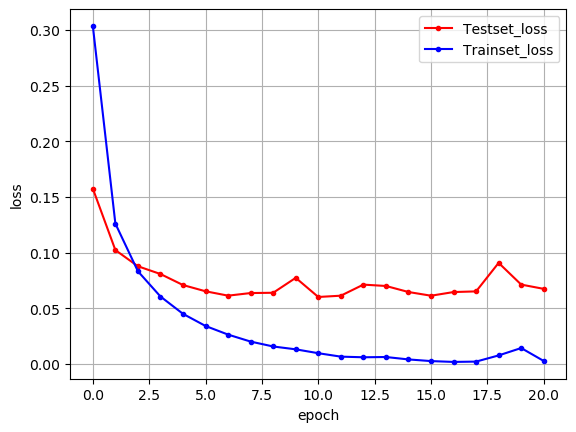

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show